In [1]:
from numpy  import *
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import requests
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
def tratar_grafo(G):
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    G = nx.convert_node_labels_to_integers(G, first_label=0)
    return G

In [3]:
def baixar_grafo(url):
    open('social/Marvel_character_partnerships.txt', 'wb').write(requests.get(url).content)
    
#baixar_grafo('http://ix.io/1omF')

In [4]:
def measures(G):
    def momment_of_degree_distribution(G,m):
        M = 0
        N = len(G)
        for i in G.nodes:
            M = M + G.degree(i)**m
        M = M/N
        return M

    N = len(G)
    M = G.number_of_edges()
    vk = dict(G.degree())
    vk = list(vk.values())
    vk = np.array(vk)
    k1 = momment_of_degree_distribution(G,1)
    k2 = momment_of_degree_distribution(G,2)
    variance = momment_of_degree_distribution(G,2) - momment_of_degree_distribution(G,1)**2
    av_cl = nx.average_clustering(G)
    l = nx.average_shortest_path_length(G)
    r=nx.degree_assortativity_coefficient(G)

    return  k1,k2,variance,av_cl,l,r

In [5]:
cl = ['ER','WS','BA']

def gerar_redes(N, k1):
    X = []
    y = []
    n_nets = 30
    
    #ER networks
    av_degree = k1
    p = av_degree/(N-1)
    for i in range(0,n_nets):
        GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
        Gcc = sorted(nx.connected_components(GER), key=len, reverse=True)
        GER = GER.subgraph(Gcc[0])
        GER = nx.convert_node_labels_to_integers(GER, first_label=0)
        k1,k2,variance,av_cl,l,r = measures(GER)
        x = [k1,k2,variance,av_cl,l,r]
        X.append(x)
        y.append(0.0)

    #WS networks
    k = int(av_degree)
    p = 0.1 #probability of rewiring
    for i in range(0,n_nets):
        GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
        Gcc = sorted(nx.connected_components(GWS), key=len, reverse=True)
        GWS = GWS.subgraph(Gcc[0])
        GWS = nx.convert_node_labels_to_integers(GWS, first_label=0)
        k1,k2,variance,av_cl,l,r = measures(GWS)
        x = [k1,k2,variance,av_cl,l,r]
        X.append(x)
        y.append(1.0)

    # BA networks
    m = int(av_degree/2)
    for i in range(0,n_nets):
        GBA = nx.barabasi_albert_graph(N, m)    
        Gcc = sorted(nx.connected_components(GBA), key=len, reverse=True)
        GBA = GBA.subgraph(Gcc[0])
        GBA = nx.convert_node_labels_to_integers(GBA, first_label=0)
        k1,k2,variance,av_cl,l,r = measures(GWS)
        x = [k1,k2,variance,av_cl,l,r]
        X.append(x)
        y.append(2.0)

    X = np.array(X)
    y = np.array(y)
    
    return X, y

In [6]:
def classificar(X, y, X_net):
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    X_net = np.array(X_net)
    X_net = X_net.reshape(1, len(X_net)) 
    X_net = scaler.transform(X_net)
    print('Xnet:', X_net.shape)
    
    # faz a predição no conjunto de teste
    k = 5
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model.fit(X,y)
    
    # faz a predição em X_net
    y_pred = model.predict(X_net) 
    print('Classe:', cl[int(y_pred)])

# Redes Sociais
## Rede 1: Os miseraveis

In [7]:
G1 = nx.readwrite.gml.read_gml("social/lesmis.gml")
G1 = tratar_grafo(G1)

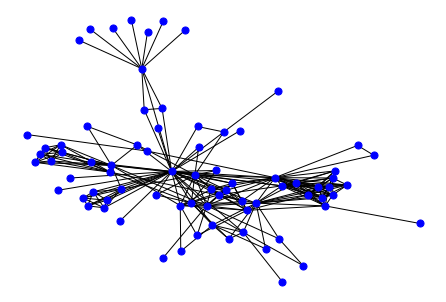

In [8]:
pos = nx.spring_layout(G1)
nx.draw(G1, pos, node_color="b", node_size=50, with_labels=False)

In [9]:
k1_1,k2_1,variance_1,av_cl_1,l_1,r_1 = measures(G1)
X_net_1 = [k1_1,k2_1,variance_1,av_cl_1,l_1,r_1]
print(X_net_1)
N1 = len(G1)

[6.597402597402597, 79.53246753246754, 36.006746500252994, 0.5731367499320134, 2.6411483253588517, -0.16522513442236916]


In [10]:
X, y = gerar_redes(N1, k1_1)
classificar(X, y, X_net_1)

Xnet: (1, 6)
Classe: ER


## Rede 2: Frozen

In [11]:
G2 = nx.readwrite.adjlist.read_adjlist("social/frozen.txt")
G2 = tratar_grafo(G2)

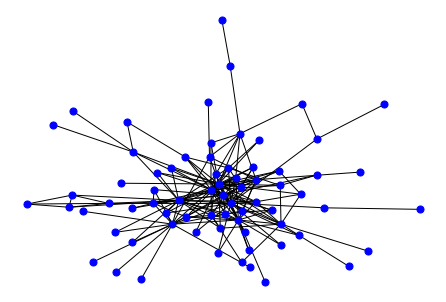

In [12]:
pos = nx.spring_layout(G2)
nx.draw(G2, pos, node_color="b", node_size=50, with_labels=False)

In [13]:
k1_2,k2_2,variance_2,av_cl_2,l_2,r_2 = measures(G2)
X_net_2 = [k1_2,k2_2,variance_2,av_cl_2,l_2,r_2]
print(X_net_2)
N2 = len(G2)

[5.070422535211268, 60.028169014084504, 34.31898432850625, 0.3714821709239664, 2.6535211267605634, -0.3176630935075854]


In [14]:
X_2, y_2 = gerar_redes(N2, k1_2)
classificar(X_2, y_2, X_net_2)

Xnet: (1, 6)
Classe: ER


## Rede 3: Karate club

In [15]:
G3 = nx.karate_club_graph()
G3 = tratar_grafo(G3)

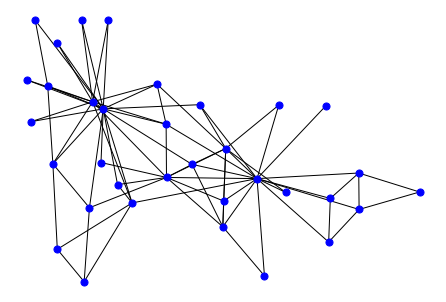

In [16]:
pos = nx.spring_layout(G3)
nx.draw(G3, pos, node_color="b", node_size=50, with_labels=False)

In [17]:
k1_3,k2_3,variance_3,av_cl_3,l_3,r_3 = measures(G3)
X_net_3 = [k1_3,k2_3,variance_3,av_cl_3,l_3,r_3]
print(X_net_3)
N3 = len(G3)

[4.588235294117647, 35.64705882352941, 14.595155709342563, 0.5706384782076823, 2.408199643493761, -0.47561309768461457]


In [18]:
X_3, y_3 = gerar_redes(N3, k1_3)
classificar(X_3, y_3, X_net_3)

Xnet: (1, 6)
Classe: ER


# Redes biológicas

## Rede 1: Zebra

In [19]:
G4 = nx.read_edgelist("biological/moreno_zebra.txt", nodetype=int, data=(('weight',float),))
G4 = tratar_grafo(G4)

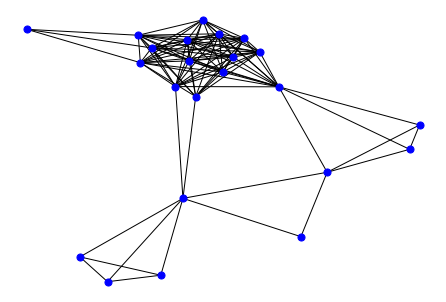

In [20]:
pos = nx.spring_layout(G4)
nx.draw(G4, pos, node_color="b", node_size=50, with_labels=False)

In [21]:
k1_4,k2_4,variance_4,av_cl_4,l_4,r_4 = measures(G4)
X_net_4 = [k1_4,k2_4,variance_4,av_cl_4,l_4,r_4]
print(X_net_4)
N4 = len(G4)

[9.130434782608695, 104.43478260869566, 21.069943289224966, 0.854334071725376, 1.8616600790513833, 0.6137897531099822]


In [22]:
X_4, y_4 = gerar_redes(N4, k1_4)
classificar(X_4, y_4, X_net_4)

Xnet: (1, 6)
Classe: WS


## Rede 2: Cattle

In [23]:
G5 = nx.read_edgelist("biological/moreno_cattle.txt", nodetype=int, data=(('weight',float),))
G5 = tratar_grafo(G5)

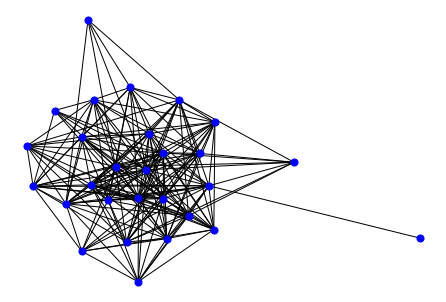

In [24]:
pos = nx.spring_layout(G5)
nx.draw(G5, pos, node_color="b", node_size=50, with_labels=False)

In [25]:
k1_5,k2_5,variance_5,av_cl_5,l_5,r_5 = measures(G5)
X_net_5 = [k1_5,k2_5,variance_5,av_cl_5,l_5,r_5]
print(X_net_5)
N5 = len(G5)

[14.642857142857142, 238.64285714285714, 24.2295918367347, 0.6459273345579184, 1.4788359788359788, -0.1328683208586124]


In [26]:
X_5, y_5 = gerar_redes(N5, k1_5)
classificar(X_5, y_5, X_net_5)

Xnet: (1, 6)
Classe: ER


## Rede 3: Bison

In [27]:
G6 = nx.read_edgelist("biological/moreno_bison.txt", nodetype=int, data=(('weight',float),))
G6 = tratar_grafo(G6)

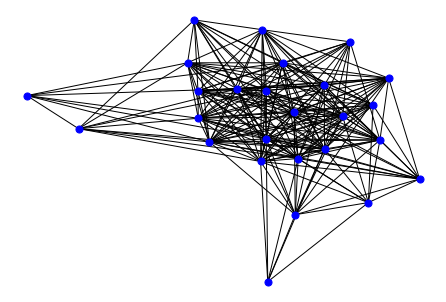

In [28]:
pos = nx.spring_layout(G6)
nx.draw(G6, pos, node_color="b", node_size=50, with_labels=False)

In [29]:
k1_6,k2_6,variance_6,av_cl_6,l_6,r_6 = measures(G6)
X_net_6 = [k1_6,k2_6,variance_6,av_cl_6,l_6,r_6]
print(X_net_6)
N6 = len(G6)

[17.076923076923077, 314.9230769230769, 23.301775147928993, 0.8131796990976713, 1.3169230769230769, -0.1042241016185634]


In [30]:
X_6, y_6 = gerar_redes(N6, k1_6)
classificar(X_6, y_6, X_net_6)

Xnet: (1, 6)
Classe: ER


# Redes Técnológicas

## Rede 1: Route Views Autonomous System

In [39]:
G7 = nx.read_edgelist("technological/linux.txt", nodetype=int, data=(('weight',float),))
G7 = tratar_grafo(G7)

In [40]:
pos = nx.spring_layout(G7)
nx.draw(G7, pos, node_color="b", node_size=50, with_labels=False)

KeyboardInterrupt: 

In [ ]:
k1_7,k2_7,variance_7,av_cl_7,l_7,r_7 = measures(G7)
X_net_7 = [k1_7,k2_7,variance_7,av_cl_7,l_7,r_7]
print(X_net_7)
N7 = len(G7)

In [ ]:
X_7, y_7 = gerar_redes(N7, k1_7)
classificar(X_7, y_7, X_net_7)

## Rede 2: Internet packet delays

In [41]:
G8 = nx.read_edgelist("technological/requirements.csv", nodetype=int, data=(('weight',float),))
G8 = tratar_grafo(G8)

TypeError: Failed to convert nodes fabricate-(latest,release),,fabricate,(latest to type <class 'int'>.

In [ ]:
pos = nx.spring_layout(G8)
nx.draw(G8, pos, node_color="b", node_size=50, with_labels=False)

In [37]:
k1_8,k2_8,variance_8,av_cl_8,l_8,r_8 = measures(G8)
X_net_8 = [k1_8,k2_8,variance_8,av_cl_8,l_8,r_8]
print(X_net_8)
N8 = len(G8)

[4.903735632183908, 1753.9906609195402, 1729.9440377691901, 0.0, 3.0804845511128733, -0.9434274286485201]


In [38]:
X_8, y_8 = gerar_redes(N8, k1_8)
classificar(X_8, y_8, X_net_8)

KeyboardInterrupt: 

## Rede 3: xxx

In [ ]:
G9 = nx.karate_club_graph()
G9 = tratar_grafo(G9)

In [ ]:
pos = nx.spring_layout(G9)
nx.draw(G9, pos, node_color="b", node_size=50, with_labels=False)

In [ ]:
k1_9,k2_9,variance_9,av_cl_9,l_9,r_9 = measures(G9)
X_net_9 = [k1_9,k2_9,variance_9,av_cl_9,l_9,r_9]
print(X_net_9)
N9 = len(G9)

In [ ]:
X_9, y_9 = gerar_redes(N9, k1_9)
classificar(X_9, y_9, X_net_9)